## Problem 2: Points to map (7 points)
 
The problem 2 this week continues the process that we started last week in Exercise 1, i.e. creating geometric point -objects and putting them into a map. 

**In this problem, our aim is to plot a map based on a set of longitude and latitude coordinates that are stored in a csv file.** 
The coordinates are in WGS84 decimal degrees, and the data is stored in `some_posts.csv` comma separated file in the folder `data`. First rows of the data look like this:
 
```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | userid |

*Note: although the data is based on real social media data, it is heavily anonymized. Userids and timestamps have been randomized, i.e. they do not not match with real ones, also spatial accuracy of the data have been lowered.*

**First:**

- Import the needed modules
- Read the data from `data/some_posts.csv` into a Pandas dataframe called `data`
- Create an empty column called `geometry` where you will store shapely Point objects
- Insert Point objects into the column `geometry` based on the coordinate columns 

**HINTS:**

You want to create a Shapely point *on each row*, based on columns `'lon'` and `'lat'`. You can achieve this by using a `for`-loop and `.iterrows()` but this approach will be extremely slow! In stead, we recommend that you try one of these approaches:

- `zip` lon and lat columns and create the points using a for-loop (loop over the zipped object), OR
- use the [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) to apply the shapely Point constructor on each row. 
- more hints in the on the [course webpages](https://automating-gis-processes.github.io/site/lessons/L2/exercise-2.html).





In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Creating data geodataframe
data = pd.read_csv('data/some_posts.csv')

# Creating the new column 'geometry' for storing coords
data['geometry'] = 0

# Updating 'geometry' with lat and lon from data  

data['geometry']  = [Point([lat, lon]) for lat, lon in zip(data['lat'], data['lon'])]

# other way: data['geometry']= data.apply(lambda row: Point(row['lat'], row['lon']), axis=1)
                       
data

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (-24.980792492 31.484633302)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (-25.499224667 31.508905612)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (-24.342578456 30.930866066)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (-24.85461393 31.519718439)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (-24.921068894 31.520835558)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (-24.79954083 31.354468659)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (-25.467991667 30.956033333)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (-25.332223289 30.997408647)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (-25.508851029 31.00553607)


In [2]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print("Number of rows:", len(data))

Number of rows: 81379


In [3]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print(data['geometry'].head())

0    POINT (-24.980792492 31.484633302)
1    POINT (-25.499224667 31.508905612)
2    POINT (-24.342578456 30.930866066)
3     POINT (-24.85461393 31.519718439)
4    POINT (-24.921068894 31.520835558)
Name: geometry, dtype: object


**Next, save the result as a shapefile:**
- Convert that DataFrame into a GeoDataFrame called `geo`, [See hints](https://automating-gis-processes.github.io/site/lessons/L2/exercise-2.html)

- Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326) **in the WKT format**

- Save output to file: `Kruger_posts.shp`



In [21]:
from pyproj import CRS

geo = gpd.GeoDataFrame(data, geometry='geometry', crs=CRS.from_epsg(4326).to_wkt())

fp = 'Kruger_posts.shp'
geo.to_file(fp)



In [22]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print("Number of rows:", len(geo))
print(geo.head())

Number of rows: 81379
         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                     geometry  
0  POINT (-24.98079 31.48463)  
1  POINT (-25.49922 31.50891)  
2  POINT (-24.34258 30.93087)  
3  POINT (-24.85461 31.51972)  
4  POINT (-24.92107 31.52084)  


In [23]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import os
assert os.path.isfile(fp), "output shapefile does not exist"

**Finally:** 
- **Create a simple map of the points** using the `geodataframe.plot()` -funtion. You might need to use the `matplotlib pyplot` `show()` method to display the image within this notebook. 

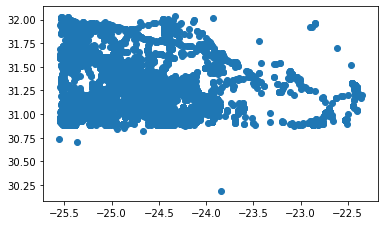

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

geo.plot()
plt.show()

- *Optional:* Download the output shapefile and create a map in a gis-software (for example, overlay the points with a basemap). If you do this, remember to upload the  map as a png image to this repository and add link to the image file to this notebook:

https://github.com/AutoGIS-2019/exercise-2-anapauor/blob/master/Fig_exe2_gis.png

Well done! Now you can move on to [Exercise-2-problem-3.ipynb](Exercise-2-problem-3.ipynb)